In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sys
sys.path.append("../")
from utils import citibike_helpers
import matplotlib.pyplot as plt

In [5]:
inputfile="../datasets/citibike/201701-citibike-tripdata.csv.gz"
_df=citibike_helpers.load_citibike_data(inputfile)

In [7]:
_df.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1230f2208>], dtype=object)

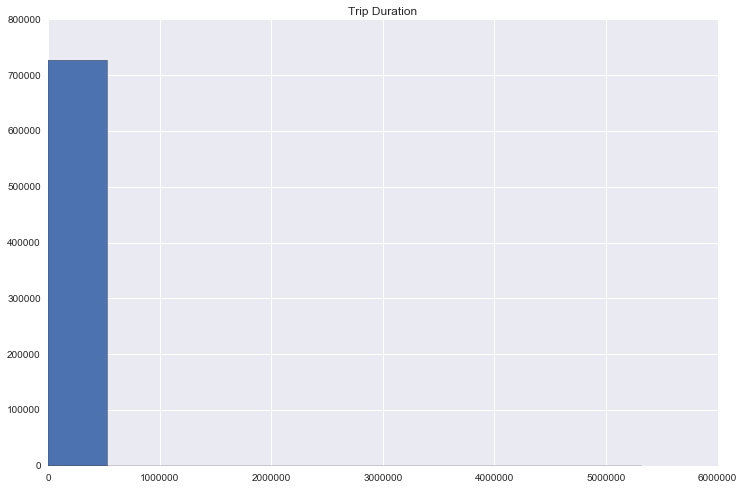

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
_df.hist(column='Trip Duration',bins=10,ax=ax)

In [ ]:
def categorize_pickup_times(dtobj):
    #0-4 Early morning (return 1)
    #5-10 Morning (return 2)
    #11-16 Afternoon (return 3)
    #17-19 Evening (return 4)
    #20-23 Night (return 5) 
    if dtobj.hour>=0 and dtobj.hour<=4:
        return 1
    elif dtobj.hour>4 and dtobj.hour<=10:
        return 2
    elif dtobj.hour>10 and dtobj.hour<=16:
        return 3
    elif dtobj.hour>16 and dtobj.hour<=19:
        return 4
    elif dtobj.hour>19 and dtobj.hour<=23:
        return 5
    